{'ELEET': <BarContainer object of 6 artists>}


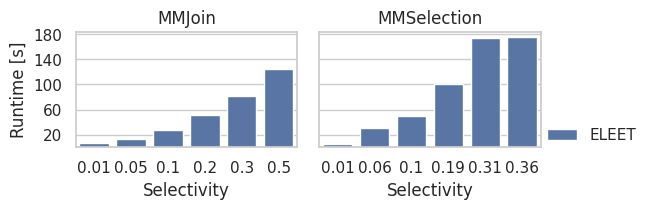

In [3]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib

from eleet.evaluate import RunDescription

RUNTIME_FILE_FEW_WORKERS = "../predictions-few-workers/test/runtimes_eleet-rotowire-64-test-limit-4294967296.csv"

runtime = pd.read_csv(RUNTIME_FILE_FEW_WORKERS)

runtime["runtime"] = runtime["runtime"] - runtime["index_build_time"]

runtime.replace({"ELEET": "ELEET"}, inplace=True)
runtime = runtime[runtime["query"].apply(lambda x: "Player" in x)]
runtime["type"] = runtime["query"].apply(lambda x: "MMSelection" if "[" in x else "MMJoin")
runtime["subset"] = runtime["query"].apply(lambda x: x.split("(")[-1].strip(")"))
runtime["selectivity"] = runtime["query"].apply(lambda x: round(float(x.split("[")[1].split("]")[0] if "[" in x else x.split("_")[1].split("(")[0]), 2))

# matplotlib.rcParams.update({'font.size': })
plt.rc('text', usetex=False)
sns.set_theme(style="whitegrid", font_scale=1.0)


fig = plt.figure(figsize=(6, 1.5))
gs = fig.add_gridspec(nrows=1, ncols=2, hspace=0.1, wspace=0.1)
                         # gridspec_kw={"width_ratios": [1, 10, 1, 1, 10, 1, 1, 10], "wspace": 0.1})
axes = gs.subplots(sharey=True)

labels = list()
handles = list()

for i, subset in enumerate(("MMJoin", "MMSelection")):
    ax = axes[i]

    sns.barplot(runtime[runtime["type"] == subset], y="runtime", x="selectivity", ax=ax, hue="method")

    handles_ax, labels_ax = ax.get_legend_handles_labels()
    handles.extend(handles_ax)
    labels.extend(labels_ax)
    ax.get_legend().remove()
    ax.set_title(subset)
    ax.set_yticks([20, 60, 100, 140, 180])
    # ax.set_yticklabels(["10", "", "50", "", "90", "", "130", "", "170"])

    ax.set_ylabel("Runtime [s]" if i == 0 else "")
    ax.set_xlabel("Selectivity")

hl_dict = {l.split("_")[0]: h for l, h in zip(labels, handles)}
print(hl_dict)
labels = ["ELEET"]
leg = fig.legend([hl_dict[l] for l in labels], labels, bbox_to_anchor=(0.9, 0.1), ncol=1, loc='lower left', borderaxespad=0., frameon=False)

plt.savefig("/home/murban/exp3-v2.pdf", bbox_inches="tight")
plt.show()

# evt barplot: gesamtlaufzeit, mean f1
